In [204]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [205]:
iris = load_iris()

In [206]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [207]:
X = iris.data
Y = iris.target

X.shape, Y.shape

((150, 4), (150,))

In [208]:
df=pd.DataFrame(iris.data)
df['class']=iris.target

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # remove any empty lines

#view the iris dataframe
print(df)

     sepal_len  sepal_wid  petal_len  petal_wid  class
0          5.1        3.5        1.4        0.2      0
1          4.9        3.0        1.4        0.2      0
2          4.7        3.2        1.3        0.2      0
3          4.6        3.1        1.5        0.2      0
4          5.0        3.6        1.4        0.2      0
..         ...        ...        ...        ...    ...
145        6.7        3.0        5.2        2.3      2
146        6.3        2.5        5.0        1.9      2
147        6.5        3.0        5.2        2.0      2
148        6.2        3.4        5.4        2.3      2
149        5.9        3.0        5.1        1.8      2

[150 rows x 5 columns]


In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [210]:
X_train = X_train.T
X_test = X_test.T

Y_train = Y_train.reshape(1, Y_train.shape[0])
Y_test = Y_test.reshape(1, Y_test.shape[0])

Y_test.shape, Y_train.shape

((1, 30), (1, 120))

In [211]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4, 120), (4, 30), (1, 120), (1, 30))

In [212]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

Y_train_encoded = encoder.fit_transform(Y_train.reshape(-1,1))
Y_test_encoded = encoder.fit_transform(Y_test.reshape(-1,1))

print(Y_train_encoded.shape)
print(Y_test_encoded.shape)

Y_train = Y_train_encoded.T
Y_test = Y_test_encoded.T

(120, 3)
(30, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [213]:
print(f"The X_train shape is {X_train.shape}")
print(f"The Y_train shape is {Y_train.shape}")
print("\n")
print(f"The X_test shape is  {X_test.shape}")
print(f"The Y_test shape is {Y_test.shape}")

The X_train shape is (4, 120)
The Y_train shape is (3, 120)


The X_test shape is  (4, 30)
The Y_test shape is (3, 30)


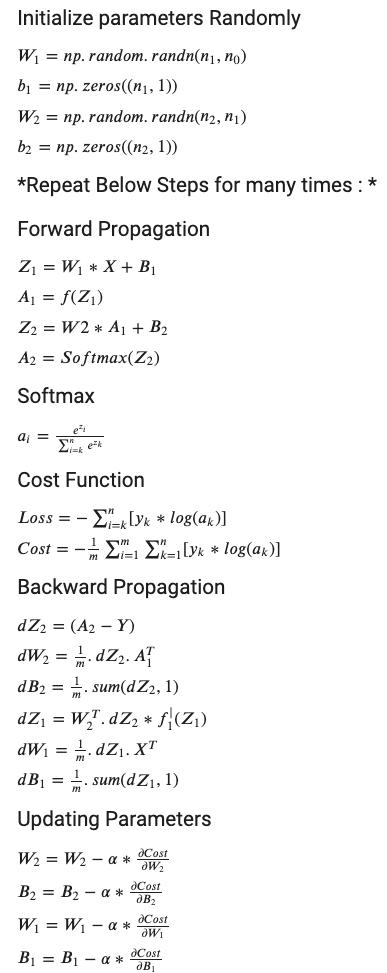

In [214]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)


In [215]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']


    print(f"The w1 is {w1.shape}")
    print(f"The b1 is {b1.shape}")
    print(f"The w2 is {w2.shape}")
    print(f"The b2 is {b2.shape}\n")

    return parameters

In [216]:
def forward_propagation(x, parameters, iterations):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    if iterations == 0:
      z1 = forward_cache['z1']
      a1 = forward_cache['a1']
      z2 = forward_cache['z2']
      a2 = forward_cache['a2']

      print(f"The z1 is {z1.shape}")
      print(f"The a1 is {a1.shape}")
      print(f"The z2 is {z2.shape}")
      print(f"The a2 is {a2.shape}\n")

    return forward_cache

In [217]:
def cost_function(a2, y):
    m = y.shape[1]

    cost = -(1/m)*np.sum(y*np.log(a2))

    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))

    return cost

In [218]:
def backward_prop(x, y, parameters, forward_cache, iterations):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    if iterations == 0:
      dw1 = gradients['dw1']
      db1 = gradients['db1']
      dw2 = gradients['dw2']
      db2 = gradients['db2']

      print(f"The dw1 is {dw1.shape}")
      print(f"The db1 is {db1.shape}")
      print(f"The dw2 is {dw2.shape}")
      print(f"The db2 is {db2.shape}\n")
    return gradients

In [219]:
def update_parameters(parameters, gradients, learning_rate):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

In [220]:
def model(x, y, n_h, learning_rate, iterations):

    n_x = x.shape[0] # features / input neurons
    n_y = y.shape[0] # number of neurons in output layer

    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):

        count = i

        forward_cache = forward_propagation(x, parameters, count)

        cost = cost_function(forward_cache['a2'], y)

        gradients = backward_prop(x, y, parameters, forward_cache, count)

        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)

    return parameters, cost_list

# LESS NEURONS, LESS ITERATIONS ---- LOW COST

In [221]:
iterations = 100
n_h = 100 # number of neurons in hidden layer
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

The w1 is (100, 4)
The b1 is (100, 1)
The w2 is (3, 100)
The b2 is (3, 1)

The z1 is (100, 120)
The a1 is (100, 120)
The z2 is (3, 120)
The a2 is (3, 120)

The dw1 is (100, 4)
The db1 is (100, 1)
The dw2 is (3, 100)
The db2 is (3, 1)

Cost after 0 iterations is : 1.0987171504602133
Cost after 10 iterations is : 1.0978210652628435
Cost after 20 iterations is : 1.096929253338403
Cost after 30 iterations is : 1.0960391414896282
Cost after 40 iterations is : 1.0951480782427834
Cost after 50 iterations is : 1.09425373204681
Cost after 60 iterations is : 1.0933540426307118
Cost after 70 iterations is : 1.0924468852561082
Cost after 80 iterations is : 1.0915299431188155
Cost after 90 iterations is : 1.0906008440618933


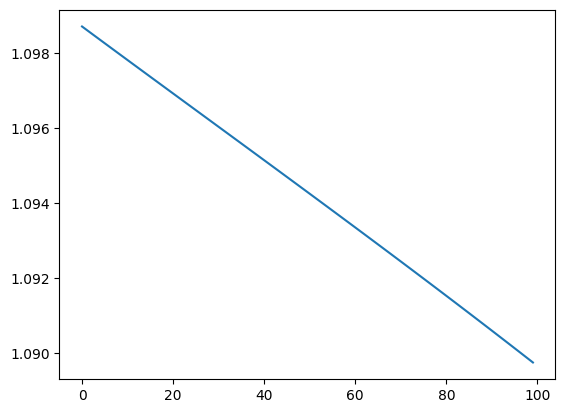

In [222]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [223]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters, iterations)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)

    a_out = np.argmax(a_out, 0)  # 0 represents row wise

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [224]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 46.666666666666664 %
Accuracy of Test Dataset 33.33 %


# LESS NEURONS, MORE ITERATIONS ---- LOW COST

In [225]:
iterations = 1000
n_h = 100 # number of neurons in hidden layer
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

The w1 is (100, 4)
The b1 is (100, 1)
The w2 is (3, 100)
The b2 is (3, 1)

The z1 is (100, 120)
The a1 is (100, 120)
The z2 is (3, 120)
The a2 is (3, 120)

The dw1 is (100, 4)
The db1 is (100, 1)
The dw2 is (3, 100)
The db2 is (3, 1)

Cost after 0 iterations is : 1.0995362635011503
Cost after 100 iterations is : 1.0850640163056473
Cost after 200 iterations is : 1.0694748415771307
Cost after 300 iterations is : 1.0511003937759589
Cost after 400 iterations is : 1.0287296922470293
Cost after 500 iterations is : 1.0020290218228618
Cost after 600 iterations is : 0.9709698663104714
Cost after 700 iterations is : 0.935707845432053
Cost after 800 iterations is : 0.8968574138093826
Cost after 900 iterations is : 0.8553904786863901


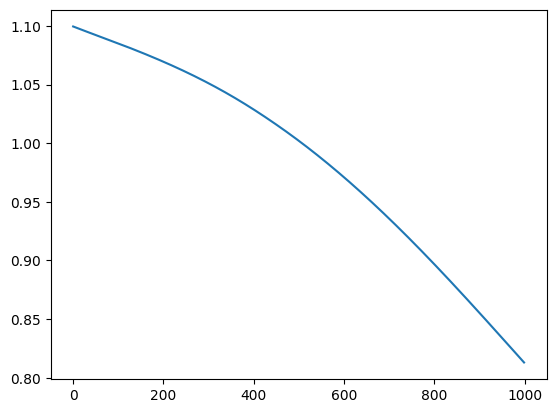

In [226]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [227]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 72.5 %
Accuracy of Test Dataset 70.0 %


# MORE NEURONS, MORE ITERATIONS ---- LOW COST



In [228]:
iterations = 10000
n_h = 1000 # number of neurons in hidden layer
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

The w1 is (1000, 4)
The b1 is (1000, 1)
The w2 is (3, 1000)
The b2 is (3, 1)

The z1 is (1000, 120)
The a1 is (1000, 120)
The z2 is (3, 120)
The a2 is (3, 120)

The dw1 is (1000, 4)
The db1 is (1000, 1)
The dw2 is (3, 1000)
The db2 is (3, 1)

Cost after 0 iterations is : 1.0975629463296734
Cost after 1000 iterations is : 0.568208595190044
Cost after 2000 iterations is : 0.39527969374725064
Cost after 3000 iterations is : 0.30524858501651186
Cost after 4000 iterations is : 0.24155272998994887
Cost after 5000 iterations is : 0.19558413300854263
Cost after 6000 iterations is : 0.16254640607397697
Cost after 7000 iterations is : 0.13856075745333457
Cost after 8000 iterations is : 0.12080718764385977
Cost after 9000 iterations is : 0.10734108481382432


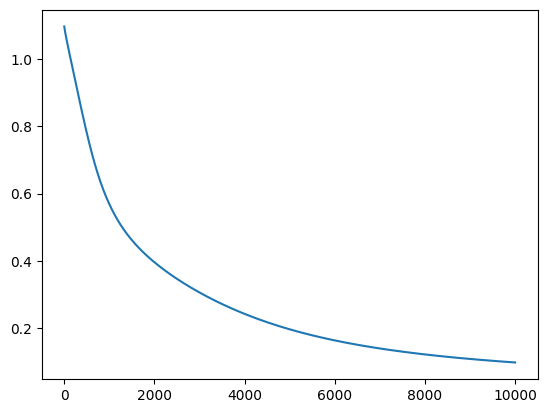

In [229]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [230]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 99.16666666666667 %
Accuracy of Test Dataset 96.67 %


# MORE NEURONS, MORE ITERATIONS ---- HIGH COST

In [231]:
iterations = 10000
n_h = 1000 # number of neurons in hidden layer
learning_rate = 0.8
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

The w1 is (1000, 4)
The b1 is (1000, 1)
The w2 is (3, 1000)
The b2 is (3, 1)

The z1 is (1000, 120)
The a1 is (1000, 120)
The z2 is (3, 120)
The a2 is (3, 120)

The dw1 is (1000, 4)
The db1 is (1000, 1)
The dw2 is (3, 1000)
The db2 is (3, 1)

Cost after 0 iterations is : 1.1010745636433084
Cost after 1000 iterations is : 0.03545515769803811
Cost after 2000 iterations is : 0.025660872324139834
Cost after 3000 iterations is : 0.021758103495824518
Cost after 4000 iterations is : 0.01946505704735782
Cost after 5000 iterations is : 0.017881308215945906
Cost after 6000 iterations is : 0.016678458459027483
Cost after 7000 iterations is : 0.0157100342852261
Cost after 8000 iterations is : 0.014894778534875421
Cost after 9000 iterations is : 0.01418500925174325


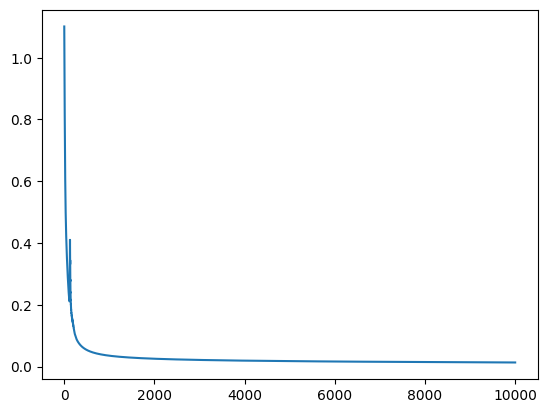

In [232]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [233]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 90.0 %


In [234]:
iterations = 1000
n_h = 1000 # number of neurons in hidden layer
learning_rate = 0.8
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

The w1 is (1000, 4)
The b1 is (1000, 1)
The w2 is (3, 1000)
The b2 is (3, 1)

The z1 is (1000, 120)
The a1 is (1000, 120)
The z2 is (3, 120)
The a2 is (3, 120)

The dw1 is (1000, 4)
The db1 is (1000, 1)
The dw2 is (3, 1000)
The db2 is (3, 1)

Cost after 0 iterations is : 1.095217889186308
Cost after 100 iterations is : 0.23293678473589371
Cost after 200 iterations is : 0.13862881348610331
Cost after 300 iterations is : 0.08125744861266543
Cost after 400 iterations is : 0.06377032289656395
Cost after 500 iterations is : 0.05398676483225038
Cost after 600 iterations is : 0.047712487053306815
Cost after 700 iterations is : 0.04331802715179977
Cost after 800 iterations is : 0.04004724632603165
Cost after 900 iterations is : 0.03750242605002359


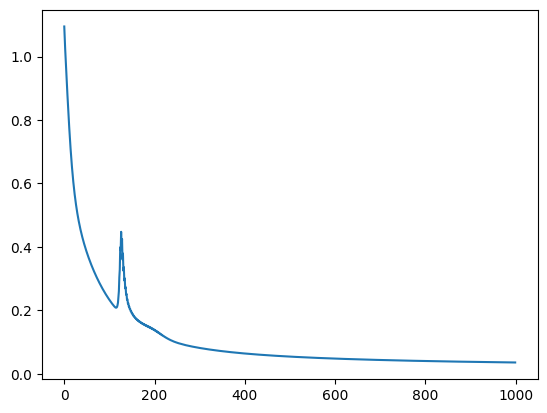

In [235]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [236]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 96.67 %
